# Dataset preprocessing

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import io
import numpy as np

def clean_wine_data(file_path):
    """
    Cleans the wine quality dataset by fixing the column headers and reformatting the data.

    Parameters:
    file_path (str): The file path to the original wine quality data CSV.

    Returns:
    None: This function saves the cleaned data into a CSV file.
    """

    # Define the path to the original data file
    original_file_path = file_path  

    # Read the data, first check the original format of the file
    with open(original_file_path, 'r') as file:
        lines = file.readlines()

    # Manually process the column headers and data to ensure each field is parsed correctly
    # Fix the headers by removing extra quotes
    fixed_columns = [col.replace('"', '') for col in lines[0].strip().split(';')]

    # Create a DataFrame
    # Re-process the raw data and merge into a string, use io.StringIO to simulate a file object
    data_string = "".join(lines)
    data_io = io.StringIO(data_string)

    # Reload the data, this time ensuring to use the correct column names
    data_corrected = pd.read_csv(data_io, delimiter=';', names=fixed_columns, skiprows=1)

    # Display the data to ensure it's loaded correctly
    print(data_corrected.head())

    # Save the processed DataFrame as a CSV file
    processed_csv_path = 'processed_wine_quality.csv'
    data_corrected.to_csv(processed_csv_path, index=False)

In [2]:
clean_wine_data('winequality-red-3.csv')

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

# Dataset exploration

In [3]:
def explore_wine_data(csv_path):
    """
    Explore the wine quality data through various visualizations and save the results in structured folders.

    Parameters:
    csv_path (str): The file path to the processed wine quality data CSV.

    Returns:
    None: This function generates and saves plots and CSV files for data exploration.
    """

    # Read the cleaned data from the CSV file
    data = pd.read_csv(csv_path)

    # Define main directory for plots
    main_plots_dir = 'wine_quality_exploration'
    if not os.path.exists(main_plots_dir):
        os.makedirs(main_plots_dir)

    # Define subdirectories for different types of plots
    subfolders = {
        'distributions': 'Distribution Plots',
        'correlations': 'Correlation Matrix',
        'boxplots': 'Boxplots by Quality',
        'violin_plots': 'Violin Plots by Quality',
        'log_transforms': 'Log Transformed Distributions',
        'pair_plots': 'Pair Plots',
        'averages': 'Average Values by Quality'
    }

    # Create subdirectories
    for folder in subfolders.values():
        folder_path = os.path.join(main_plots_dir, folder)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)

    # Define combination directory within main directory
    combination_dir = os.path.join(main_plots_dir, 'combination')
    if not os.path.exists(combination_dir):
        os.makedirs(combination_dir)

    # Generate and save plots for each data exploration method
    # Distribution plots
    for column in data.columns:
        plt.figure(figsize=(10, 4))
        sns.histplot(data[column], kde=True, element="step", color='blue')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plot_path = os.path.join(main_plots_dir, subfolders['distributions'], f'{column}_distribution.png')
        plt.savefig(plot_path)
        plt.close()

    # Correlation matrix plot
    correlation_matrix = data.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title('Correlation Matrix of Wine Quality Attributes')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    heatmap_path = os.path.join(main_plots_dir, subfolders['correlations'], 'correlation_matrix_heatmap.png')
    plt.savefig(heatmap_path)
    plt.close()

    # Boxplots and violin plots by wine quality
    for column in data.columns[:-1]:  # Assuming the last column is 'quality'
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='quality', y=column, data=data)
        plt.title(f'Boxplot of {column} by Wine Quality')
        boxplot_path = os.path.join(main_plots_dir, subfolders['boxplots'], f'{column}_boxplot.png')
        plt.savefig(boxplot_path)
        plt.close()

        plt.figure(figsize=(8, 4))
        sns.violinplot(x='quality', y=column, data=data)
        plt.title(f'Violin Plot of {column} by Wine Quality')
        violinplot_path = os.path.join(main_plots_dir, subfolders['violin_plots'], f'{column}_violinplot.png')
        plt.savefig(violinplot_path)
        plt.close()

    # Log transformed histograms
    for column in data.columns[:-1]:
        data[f'log_{column}'] = np.log1p(data[column])
        plt.figure(figsize=(10, 4))
        sns.histplot(data[f'log_{column}'], kde=True, element="step", bins=30)
        plt.title(f'Log Transformed Distribution of {column}')
        log_dist_path = os.path.join(main_plots_dir, subfolders['log_transforms'], f'log_{column}_distribution.png')
        plt.savefig(log_dist_path)
        plt.close()

    # Pair plots for selected features
    sns.pairplot(data[['alcohol', 'volatile acidity', 'sulphates', 'quality']], hue='quality', corner=True)
    pairplot_path = os.path.join(main_plots_dir, subfolders['pair_plots'], 'pairplot_selected_features.png')
    plt.savefig(pairplot_path)
    plt.close()

    # Calculate averages by quality and save to CSV
    quality_grouped = data.groupby('quality').mean()
    quality_means_path = os.path.join(main_plots_dir, subfolders['averages'], 'quality_grouped_means.csv')
    quality_grouped.to_csv(quality_means_path, index=False)

def combine_plots_to_montage(source_folder, output_folder, output_filename, columns=6):
    """
    Combine all .png images in a source folder into a single montage image and save it to the specified output folder.

    Parameters:
    source_folder (str): The folder containing the individual .png image files.
    output_folder (str): The folder where the combined image will be saved.
    output_filename (str): The filename for the combined image.
    columns (int): Number of images per row in the montage.

    Returns:
    None: The function saves the combined image as a file.
    """
    # List all PNG files in the source folder
    plot_files = [os.path.join(source_folder, f) for f in os.listdir(source_folder) if f.endswith('.png')]
    if not plot_files:
        print("No PNG files found in the directory.")
        return

    # Open all the images
    plot_images = [Image.open(f) for f in plot_files]

    # Determine the size of each image
    width, height = plot_images[0].size

    # Calculate the dimensions of the montage image
    num_images = len(plot_images)
    rows = (num_images + columns - 1) // columns  # Ceiling division
    montage_width = width * columns
    montage_height = height * rows

    # Create a new image to hold the montage
    montage_image = Image.new('RGB', (montage_width, montage_height))

    # Paste images into the montage
    for i, image in enumerate(plot_images):
        x = (i % columns) * width
        y = (i // columns) * height
        montage_image.paste(image, (x, y))

    # Save the montage image
    output_path = os.path.join(output_folder, output_filename)
    montage_image.save(output_path)
    print(f"Montage image saved to {output_path}")

In [4]:
explore_wine_data('processed_wine_quality.csv')
combine_plots_to_montage('wine_quality_exploration/Distribution Plots', 'wine_quality_exploration/combination', 'combined_distribution.png')

C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

Montage image saved to wine_quality_exploration/combination\combined_distribution.png


# Selection of hyperparameters and preservation of optimal models with training results

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def preprocess_data(file_path, model_type):
    """
    Preprocess the data based on the model type.
    
    Args:
        file_path (str): Path to the dataset file.
        model_type (str): Model type ("RF", "SVM", "ANN").
    
    Returns:
        X, y, X_train, X_test, y_train, y_test: Processed features and labels, split into training and testing sets.
    """
    # Read data
    df = pd.read_csv(file_path)
    
    # Handle missing values
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    X_imputed = imputer.fit_transform(df.drop(['quality'], axis=1))
    y = df['quality']
    
    # Feature normalization
    scaler = StandardScaler()
    X = scaler.fit_transform(X_imputed)
    
    if model_type == "ANN":
        # One-hot encode the labels for ANN
        y = to_categorical(y)
        num_classes = y.shape[1]  # This should correctly reflect the number of classes
    else:
        num_classes = len(np.unique(y))  # For non-ANN models if needed elsewhere
        print(np.unique(y))
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    
    return X, y, X_train, X_test, y_train, y_test, num_classes  # Return num_classes to use in model creation

In [6]:
import numpy as np
import joblib
import json
import os
import psutil
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback

class MemoryCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        process = psutil.Process(os.getpid())
        # print(f"Memory usage at epoch {epoch}: {process.memory_info().rss / 1024 ** 2:.2f} MB")

def create_model(neurons, layers, input_shape, num_classes):
    """
    Function to create and compile a neural network model.
    
    Args:
        neurons (int): Number of neurons in each hidden layer.
        layers (int): Number of hidden layers.
        input_shape (int): The number of features in the training data.
        num_classes (int): The number of classes in the target labels.
    
    Returns:
        model (Keras model): Compiled neural network model.
    """
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_shape, activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  # Ensure this matches the number of classes
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    
def train_and_evaluate_model(X_train, y_train, X_test, y_test, neurons, layers, epochs, batch_size, num_classes):
    model = create_model(neurons=neurons, layers=layers, input_shape=X_train.shape[1], num_classes= num_classes)
    memory_callback = MemoryCallback()
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, callbacks=[memory_callback])
    score = model.evaluate(X_test, y_test, verbose=0)
    return score[1]  # Return accuracy

from tensorflow.keras.models import load_model

def hyperparameter_tuning(X_train, y_train, model_type, result_file, num_classes):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = {}
    test = 0

    if model_type in ["RF", "SVM"]:
        if model_type == "RF":
            params = {
                'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
                'max_depth': [None, 10, 20, 30, 40, 50],
                'min_samples_split': [2, 5, 10]
            }
            model = RandomForestClassifier(random_state=42)
        elif model_type == "SVM":
            params = {
                'C': [0.1, 1, 10],
                'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                'gamma': ['scale', 'auto', 0.1, 1]
            }
            model = SVC(random_state=42)
            
        grid_search = GridSearchCV(model, params, cv=kf, scoring='accuracy', n_jobs=-1, verbose=1)
        
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        results = grid_search.cv_results_

        # Save results and model using joblib
        joblib.dump(best_model, f'{model_type}_best_model_{result_file}.pkl')
        
    elif model_type == "ANN":  # For ANN
        best_score = 0
        best_params = None
        results['mean_test_score'] = []
        results['params'] = []

        param_grid = {
            'neurons': [16, 32, 64],
            'layers': [1, 2, 3],
            'epochs': [50, 100, 150],
            'batch_size': [10, 20, 30]
        }
        for neurons in param_grid['neurons']:
            for layers in param_grid['layers']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        scores = []
                        for train_index, test_index in kf.split(X_train):
                            X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
                            y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
                            score = train_and_evaluate_model(X_train_fold, y_train_fold, X_test_fold, y_test_fold, neurons, layers, epochs, batch_size, num_classes)
                            scores.append(score)
                        mean_score = np.mean(scores)
                        results['mean_test_score'].append(mean_score)
                        results['params'].append({
                            'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size
                        })
                        if mean_score > best_score:
                            best_score = mean_score
                            best_params = {
                                'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size
                            }
        best_model = create_model(best_params['neurons'], best_params['layers'], X_train.shape[1], num_classes)
        best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)
        model_save_path = f'{model_type}_best_model_{result_file}.h5'
        best_model.save(model_save_path)
    else:
        print("Wrong typed model")

    # Save results
    result_json_path = f'{model_type}_cv_results_{result_file}.json'
    if results:
        for key in results.keys():
            if isinstance(results[key], np.ndarray):
                results[key] = results[key].tolist()
        with open(result_json_path, 'w') as f:
            json.dump(results, f)
    with open(f'{model_type}_best_params_{result_file}.txt', 'w') as f:
        f.write(json.dumps(best_params))
    return best_model, best_params

# Visualization of training results

In [7]:
import matplotlib.pyplot as plt
import json

def visualize_results(model_type, result_file):
    """
    Load GridSearchCV results from a file and visualize the hyperparameter tuning performance.
    
    Args:
        model_type (str): Model type ("RF", "SVM", "ANN") used for identifying the result file.
    """
    with open(f'{model_type}_cv_results_{result_file}.json', 'r') as f:
        results = json.load(f)
    
    mean_test_scores = results['mean_test_score']
    params = [str(p) for p in results['params']]
    
    plt.figure(figsize=(35, 6))
    plt.plot(params, mean_test_scores, marker='o')
    plt.title(f'Hyperparameter Tuning Results for {model_type}')
    plt.xlabel('Parameters')
    plt.ylabel('Mean Test Score')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

# Model performance testing

In [8]:
import time
from sklearn.metrics import accuracy_score
import joblib

def test_model(X_train, y_train, X_test, y_test, model_type, result_file):
    """
    Load the best model parameters from a file, construct the model, and test its performance.
    
    Args:
        X_train, y_train, X_test, y_test (np.array): Training and testing data sets.
        model_type (str): Model type ("RF", "SVM", "ANN").
    
    Returns:
        test_accuracy (float): Accuracy on the test set.
    """
    model_path = f'{model_type}_best_model_{result_file}'
    if model_type == "ANN":
        model_path += '.h5'  # Keras 
        model = load_model(model_path)
    else:
        model_path += '.pkl'  # joblib 
        model = joblib.load(model_path)

    # Train the model and calculate the training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    print(f"Training completed in {training_time:.4f} seconds.")

    # Evaluate on training data
    if model_type == "ANN":
        y_pred_train = model.predict(X_train, verbose=0)
        y_pred_train = np.argmax(y_pred_train, axis=1)  # Convert prediction results to class labels
        y_train_labels = np.argmax(y_train, axis=1) if y_train.ndim > 1 else y_train  # Make sure y_train is in class label form
        training_accuracy = accuracy_score(y_train_labels, y_pred_train)
    else:
        y_pred_train = model.predict(X_train)
        training_accuracy = accuracy_score(y_train, y_pred_train)
    print(f"Training Accuracy: {training_accuracy:.4f}")

    # Evaluate on testing data
    if model_type == "ANN":
        y_pred_test = model.predict(X_test, verbose=0)
        y_pred_test = np.argmax(y_pred_test, axis=1)  # Convert prediction results to class labels
        y_test_labels = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test  # Make sure y_test is in class label form
        test_accuracy = accuracy_score(y_test_labels, y_pred_test)
    else:
        y_pred_test = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Test Accuracy: {test_accuracy:.4f}")

    return test_accuracy

# Setup for fully automated operation

In [9]:
def full_process(file_path, model_type, result_file):
    """
    Run the full process from data preprocessing to model testing and results visualization.
    
    Args:
        file_path (str): Path to the dataset file.
        model_type (str): Model type ("RF", "SVM", "ANN").
    """
    # Data preprocessing
    X, y, X_train, X_test, y_train, y_test, num_classes= preprocess_data(file_path, model_type)
    
    # Hyperparameter tuning
    best_model, best_params= hyperparameter_tuning(X_train, y_train, model_type, result_file, num_classes)
    print(f"Best parameters found: {best_params}")

    # Visualize results
    visualize_results(model_type, result_file)
    
    # Test the model
    test_accuracy = test_model(X_train, y_train, X_test, y_test, model_type, result_file)
    print(f"Final test accuracy: {test_accuracy:.4f}")

# Actually running the code

[3 4 5 6 7 8]
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


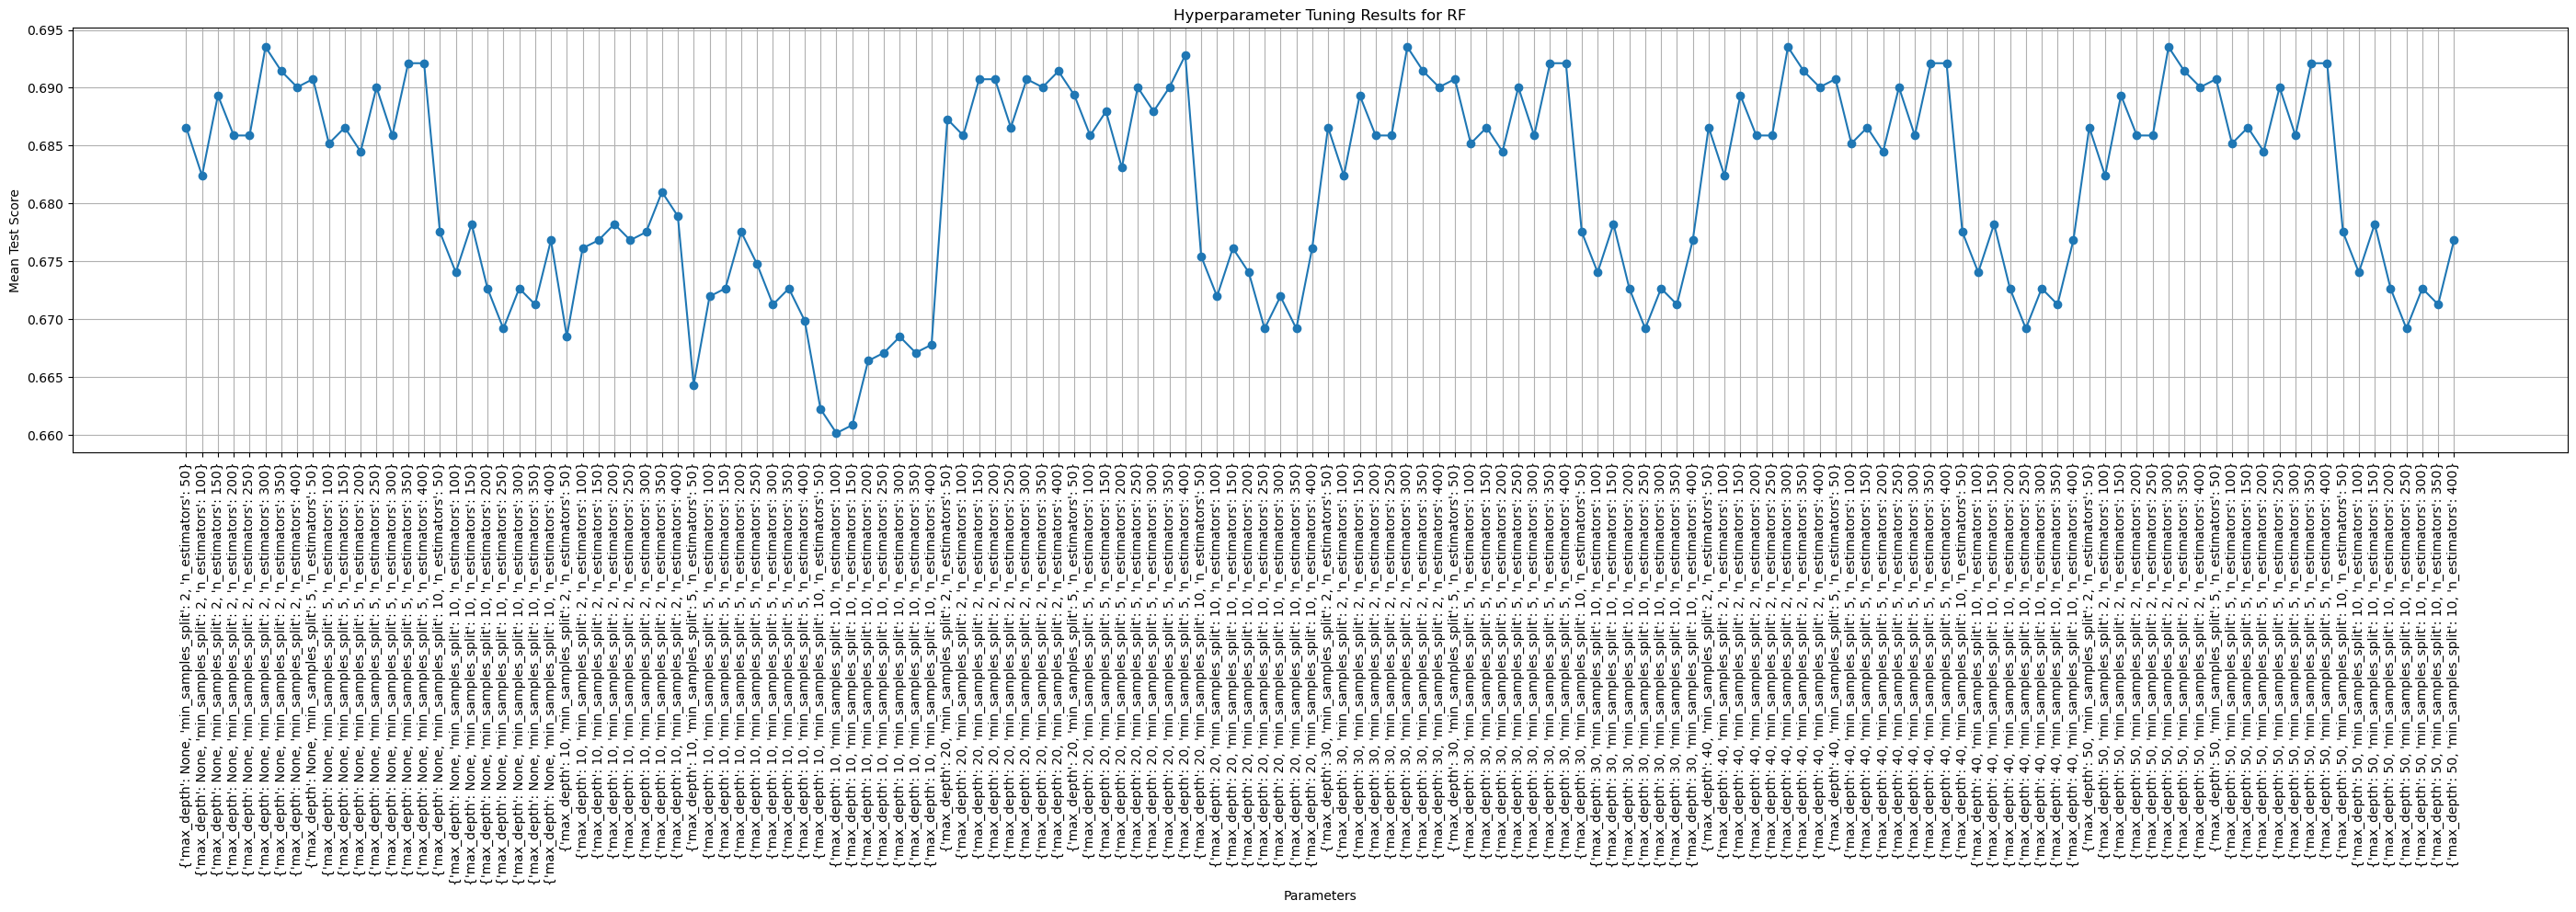

Training completed in 0.6942 seconds.
Training Accuracy: 1.0000
Test Accuracy: 0.6625
Final test accuracy: 0.6625


In [10]:
full_process('processed_wine_quality.csv', 'RF','origin')

[3 4 5 6 7 8]
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}


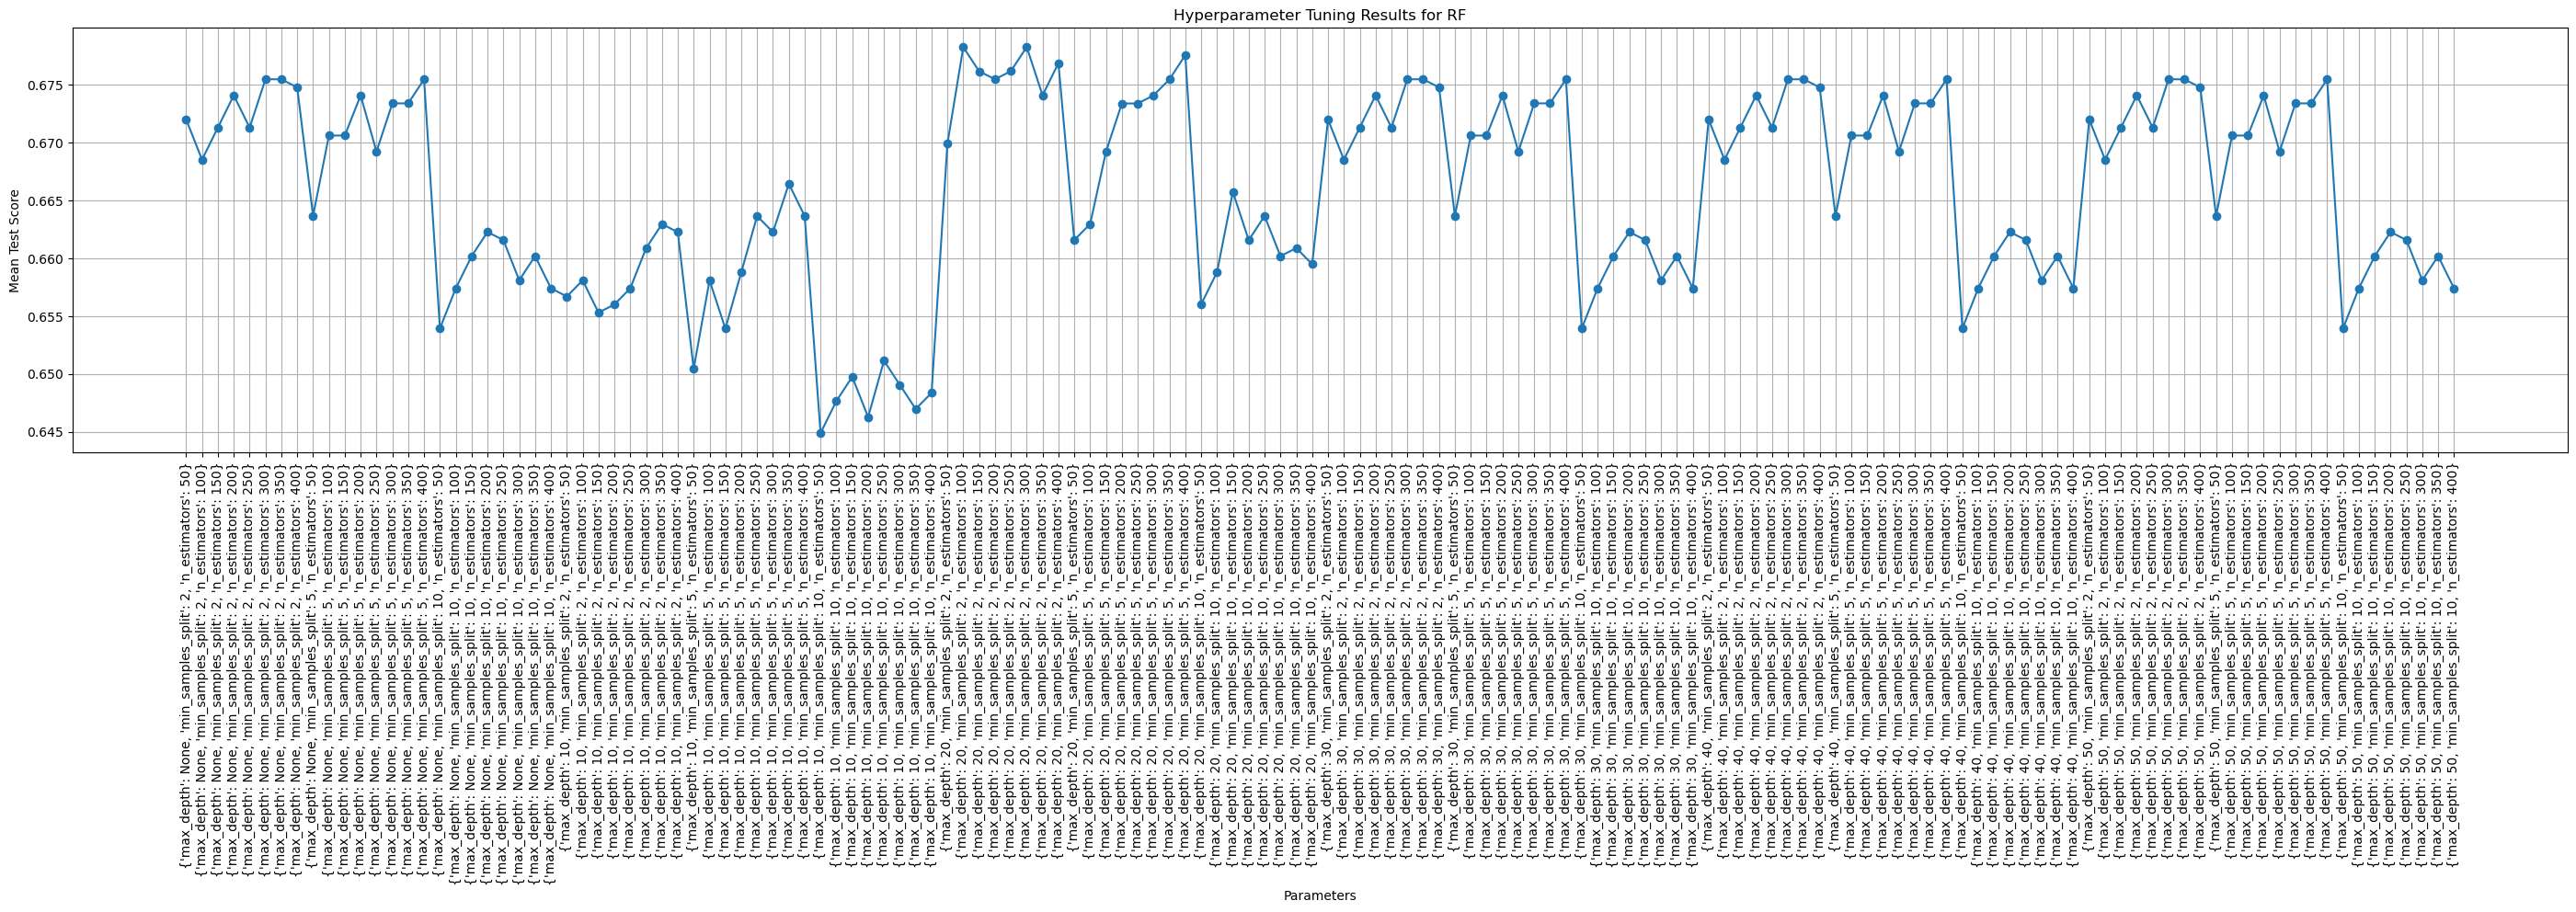

Training completed in 0.7325 seconds.
Training Accuracy: 1.0000
Test Accuracy: 0.7125
Final test accuracy: 0.7125


In [11]:
full_process('processed_wine_quality_pca.csv', 'RF','pca')

[3 4 5 6 7 8]
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


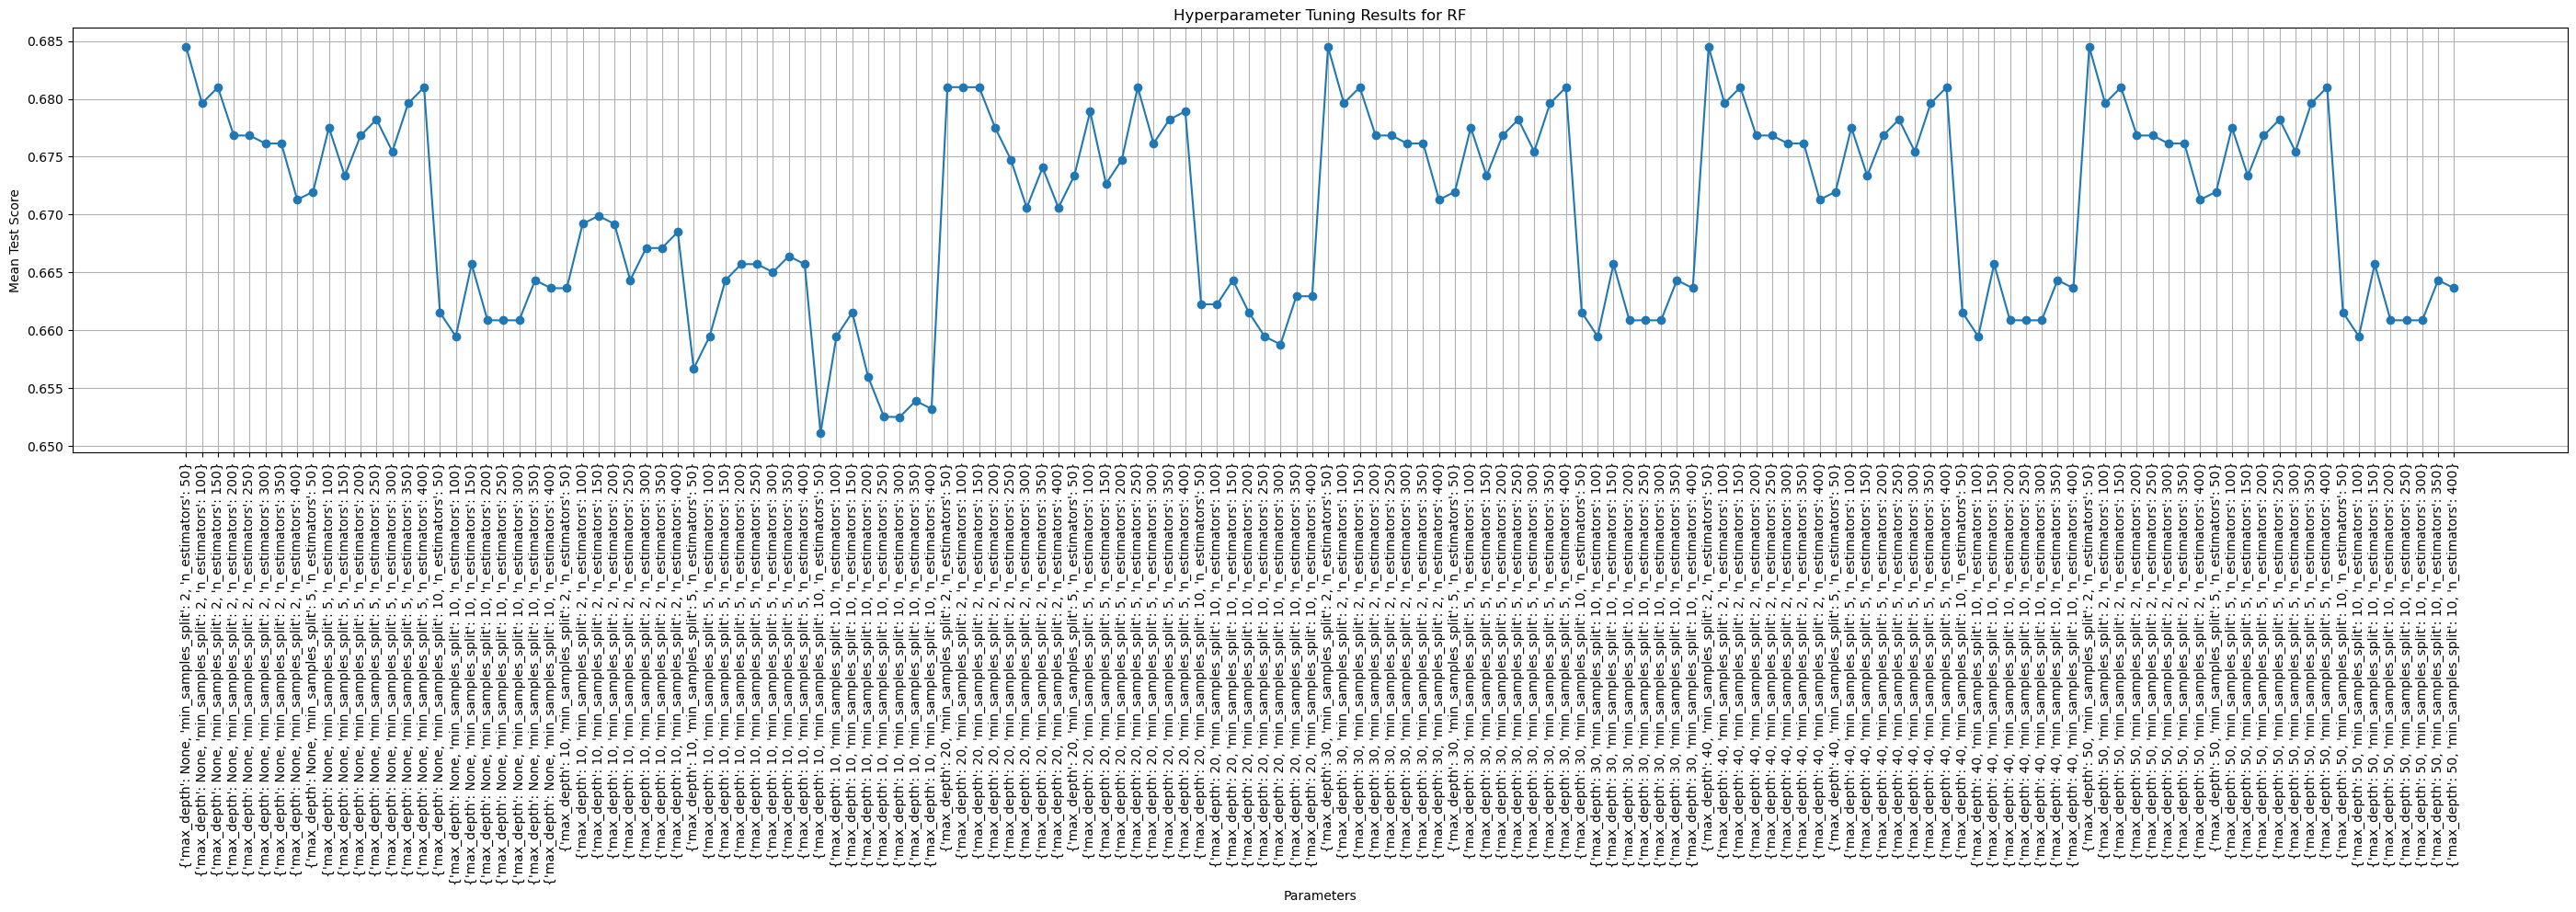

Training completed in 0.0809 seconds.
Training Accuracy: 0.9993
Test Accuracy: 0.6813
Final test accuracy: 0.6813


In [12]:
full_process('processed_wine_quality_feature_selected.csv', 'RF','feature_selected')

[3 4 5 6 7 8]
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


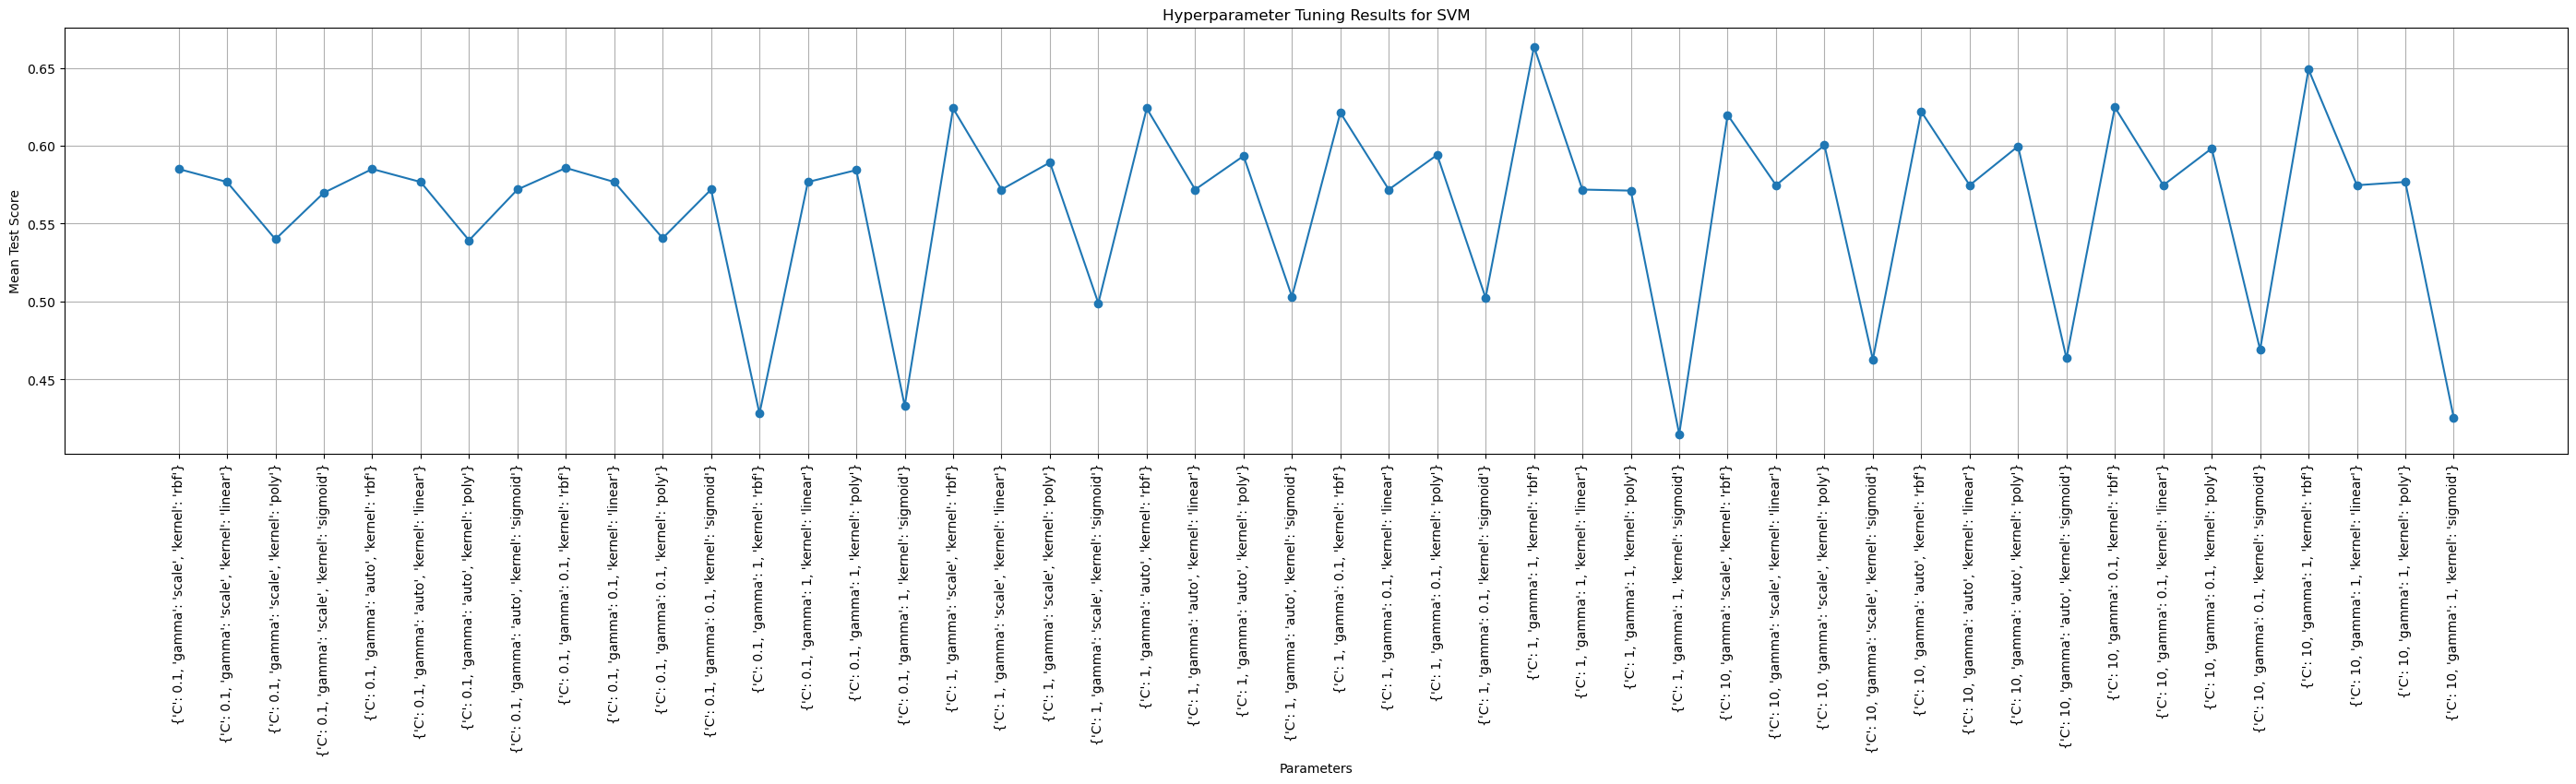

Training completed in 0.0770 seconds.
Training Accuracy: 0.9361
Test Accuracy: 0.6562
Final test accuracy: 0.6562


In [13]:
full_process('processed_wine_quality.csv', 'SVM','origin')

[3 4 5 6 7 8]
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


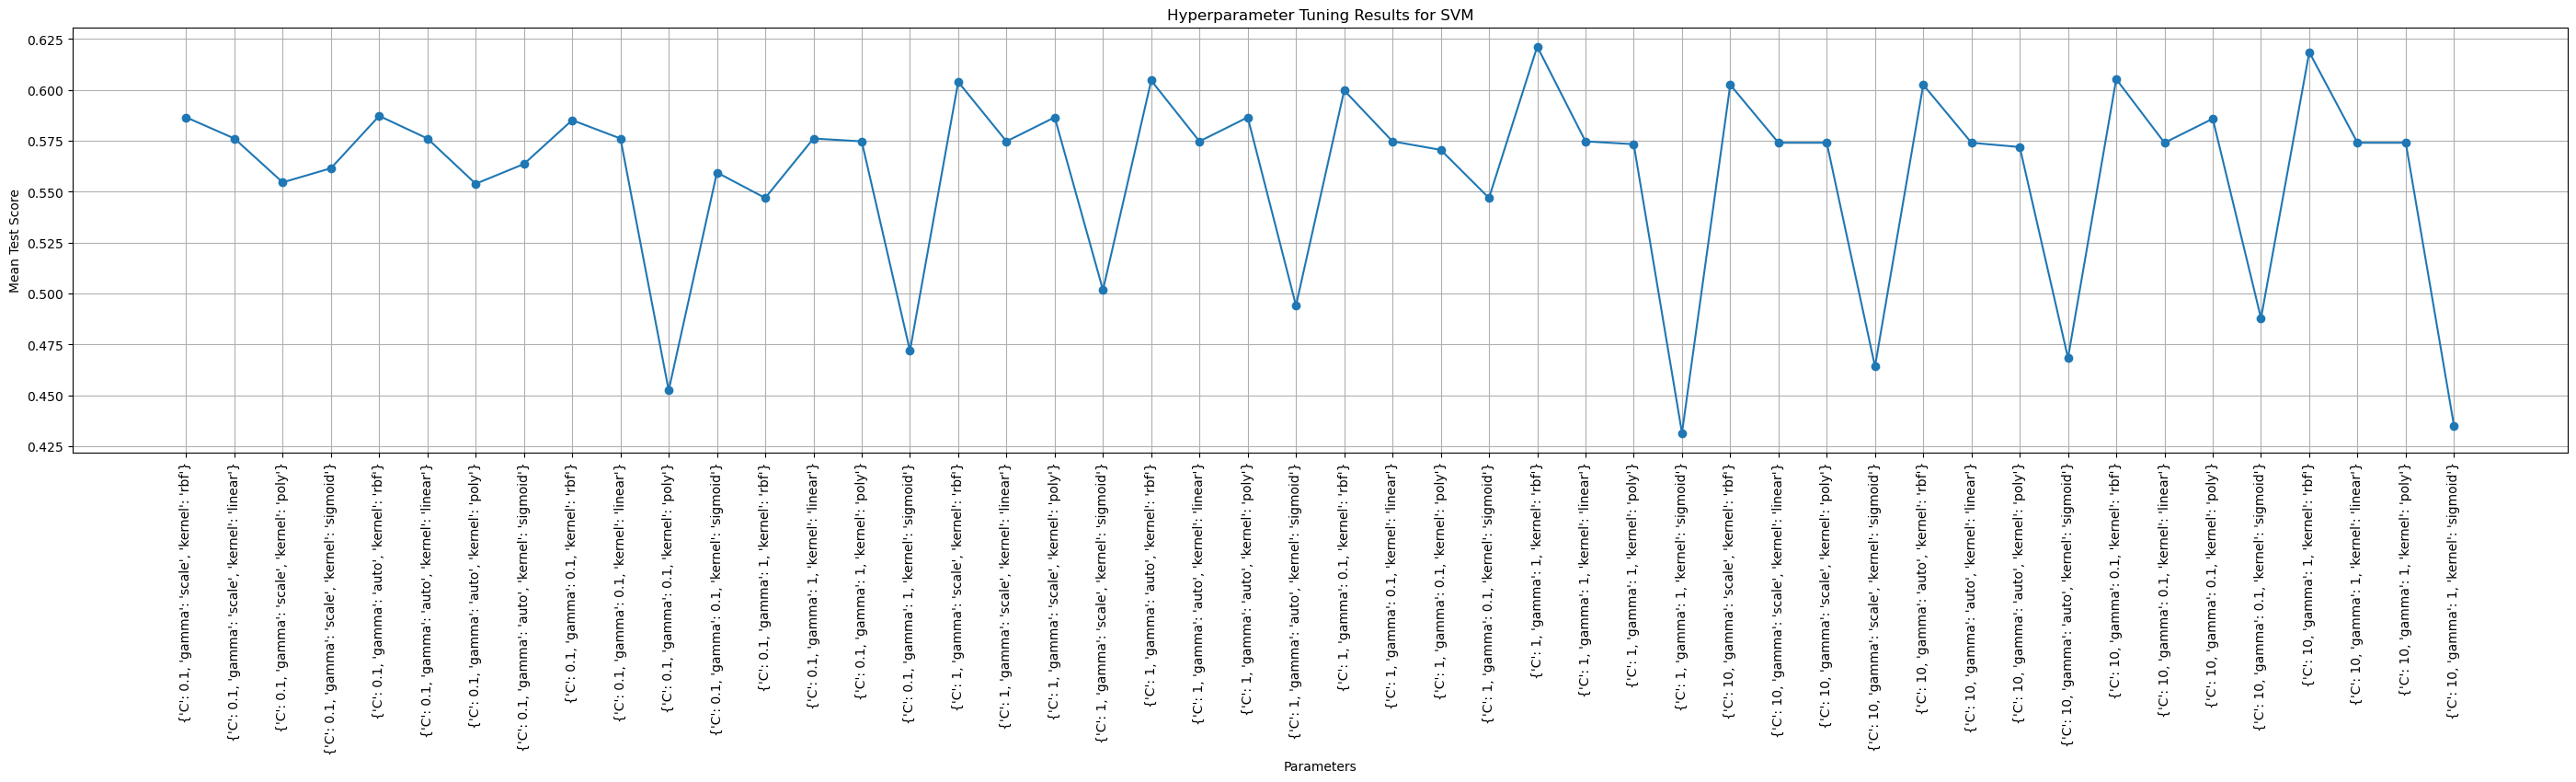

Training completed in 0.0510 seconds.
Training Accuracy: 0.7901
Test Accuracy: 0.6000
Final test accuracy: 0.6000


In [14]:
full_process('processed_wine_quality_pca.csv', 'SVM','pca')

[3 4 5 6 7 8]
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


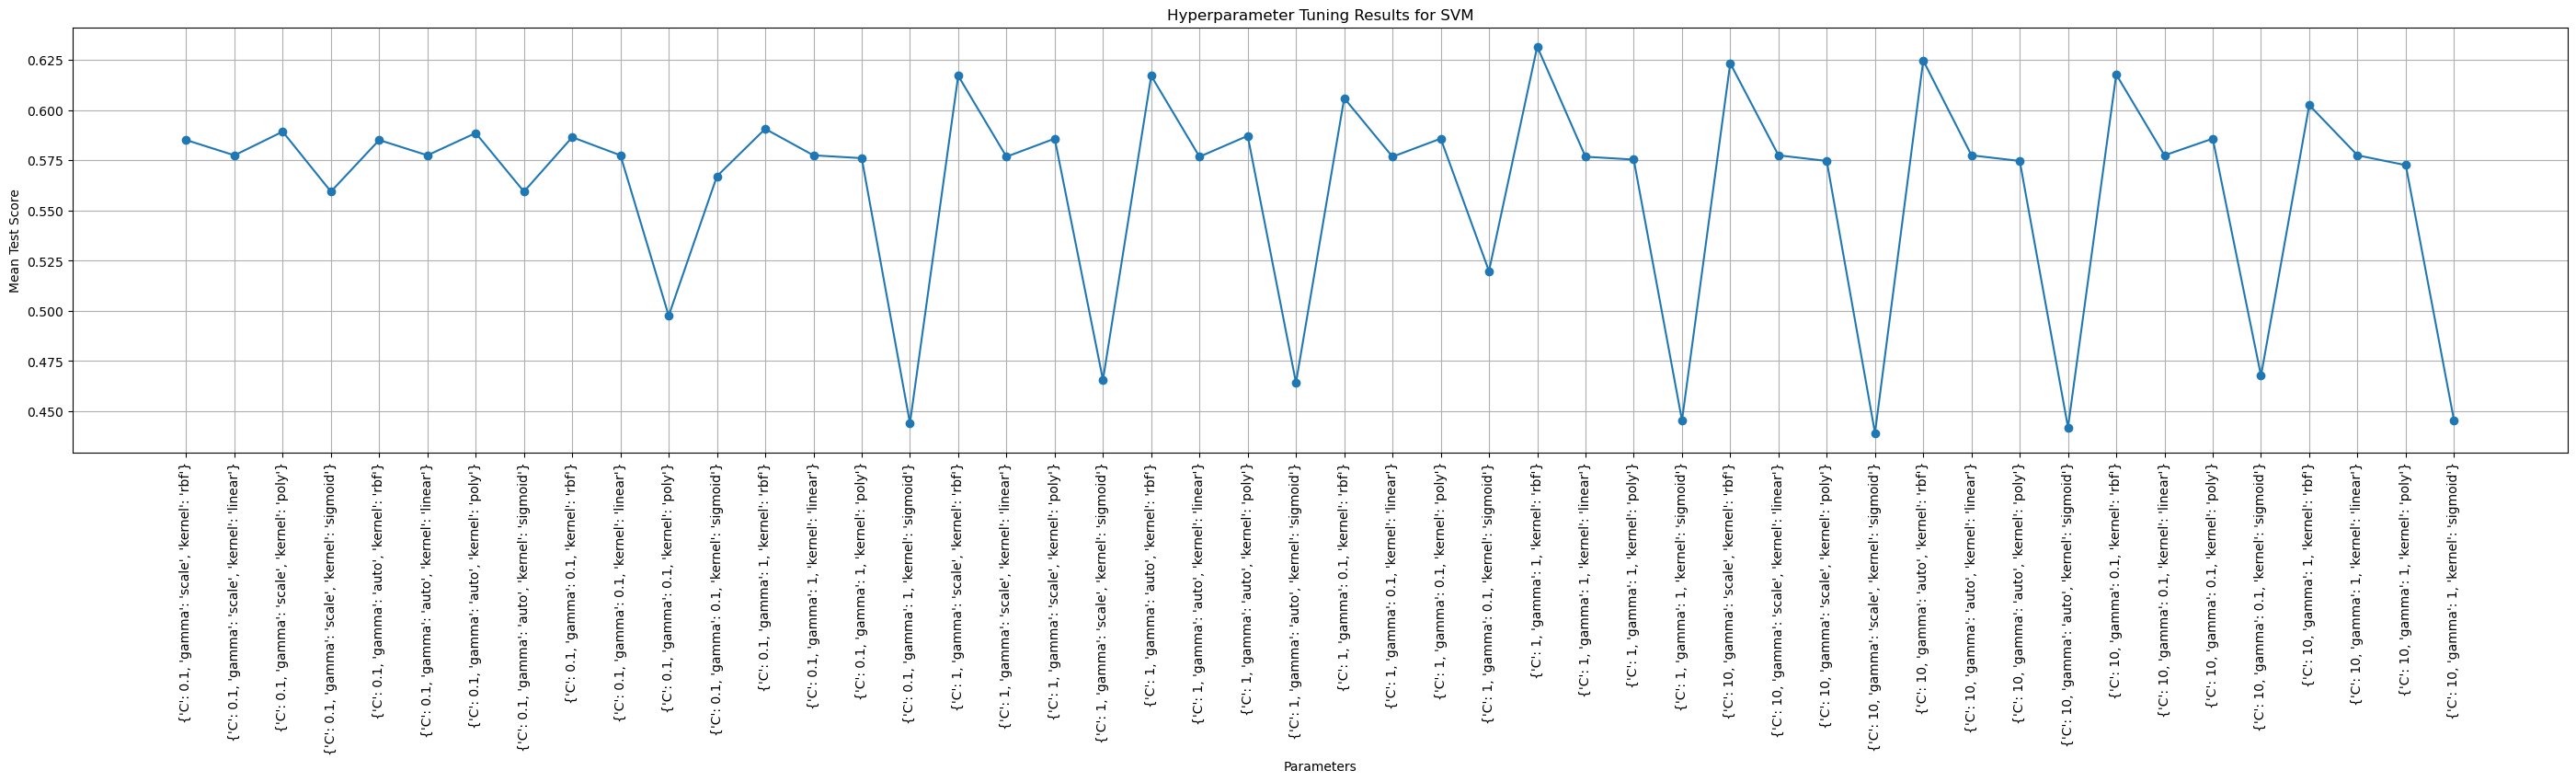

Training completed in 0.0481 seconds.
Training Accuracy: 0.7443
Test Accuracy: 0.5938
Final test accuracy: 0.5938


In [15]:
full_process('processed_wine_quality_feature_selected.csv', 'SVM','feature_selected')

Best parameters found: {'neurons': 64, 'layers': 2, 'epochs': 150, 'batch_size': 20}


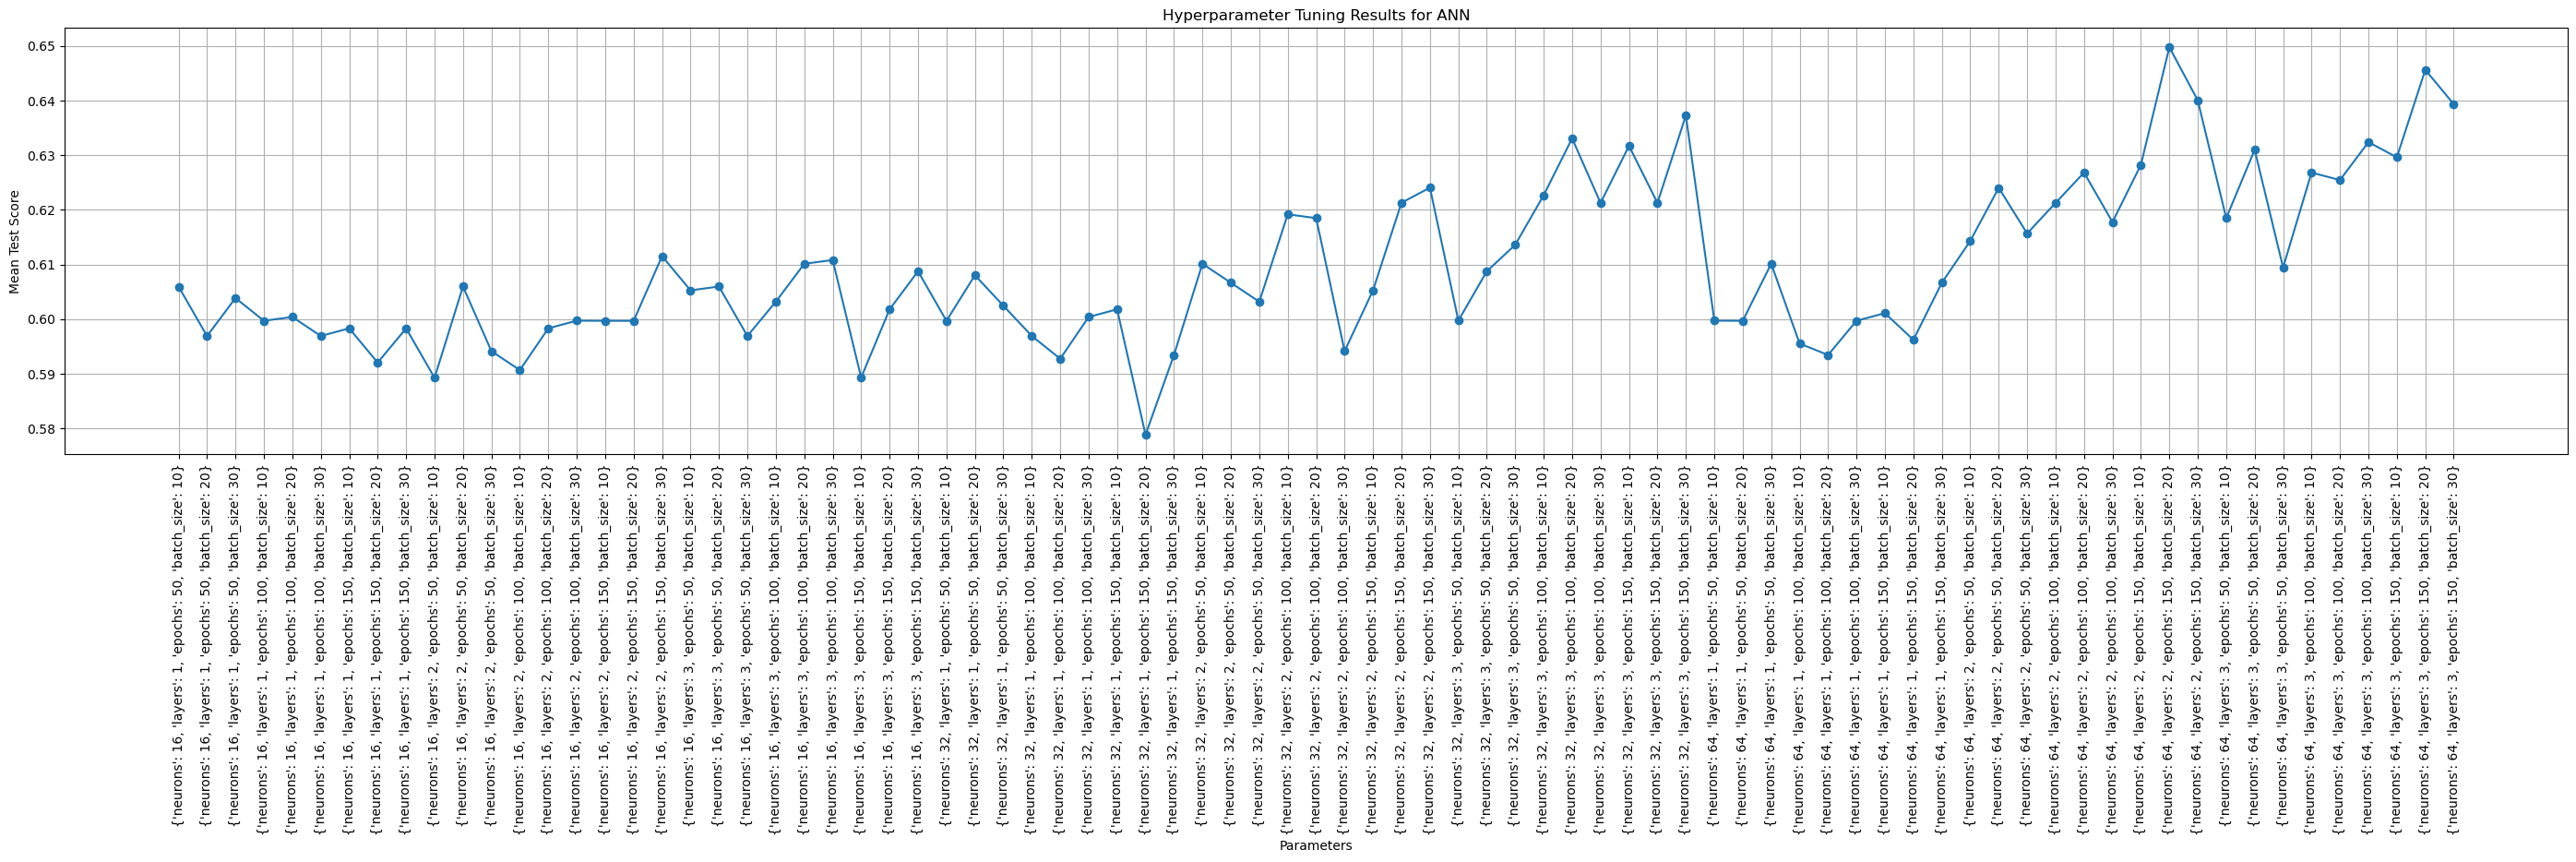

45/45 [==============================] - 0s 2ms/step - loss: 0.2008 - accuracy: 0.9465
Training completed in 0.2109 seconds.
Training Accuracy: 0.9569
Test Accuracy: 0.6312
Final test accuracy: 0.6312


In [16]:
full_process('processed_wine_quality.csv', 'ANN','origin')

Best parameters found: {'neurons': 64, 'layers': 3, 'epochs': 100, 'batch_size': 30}


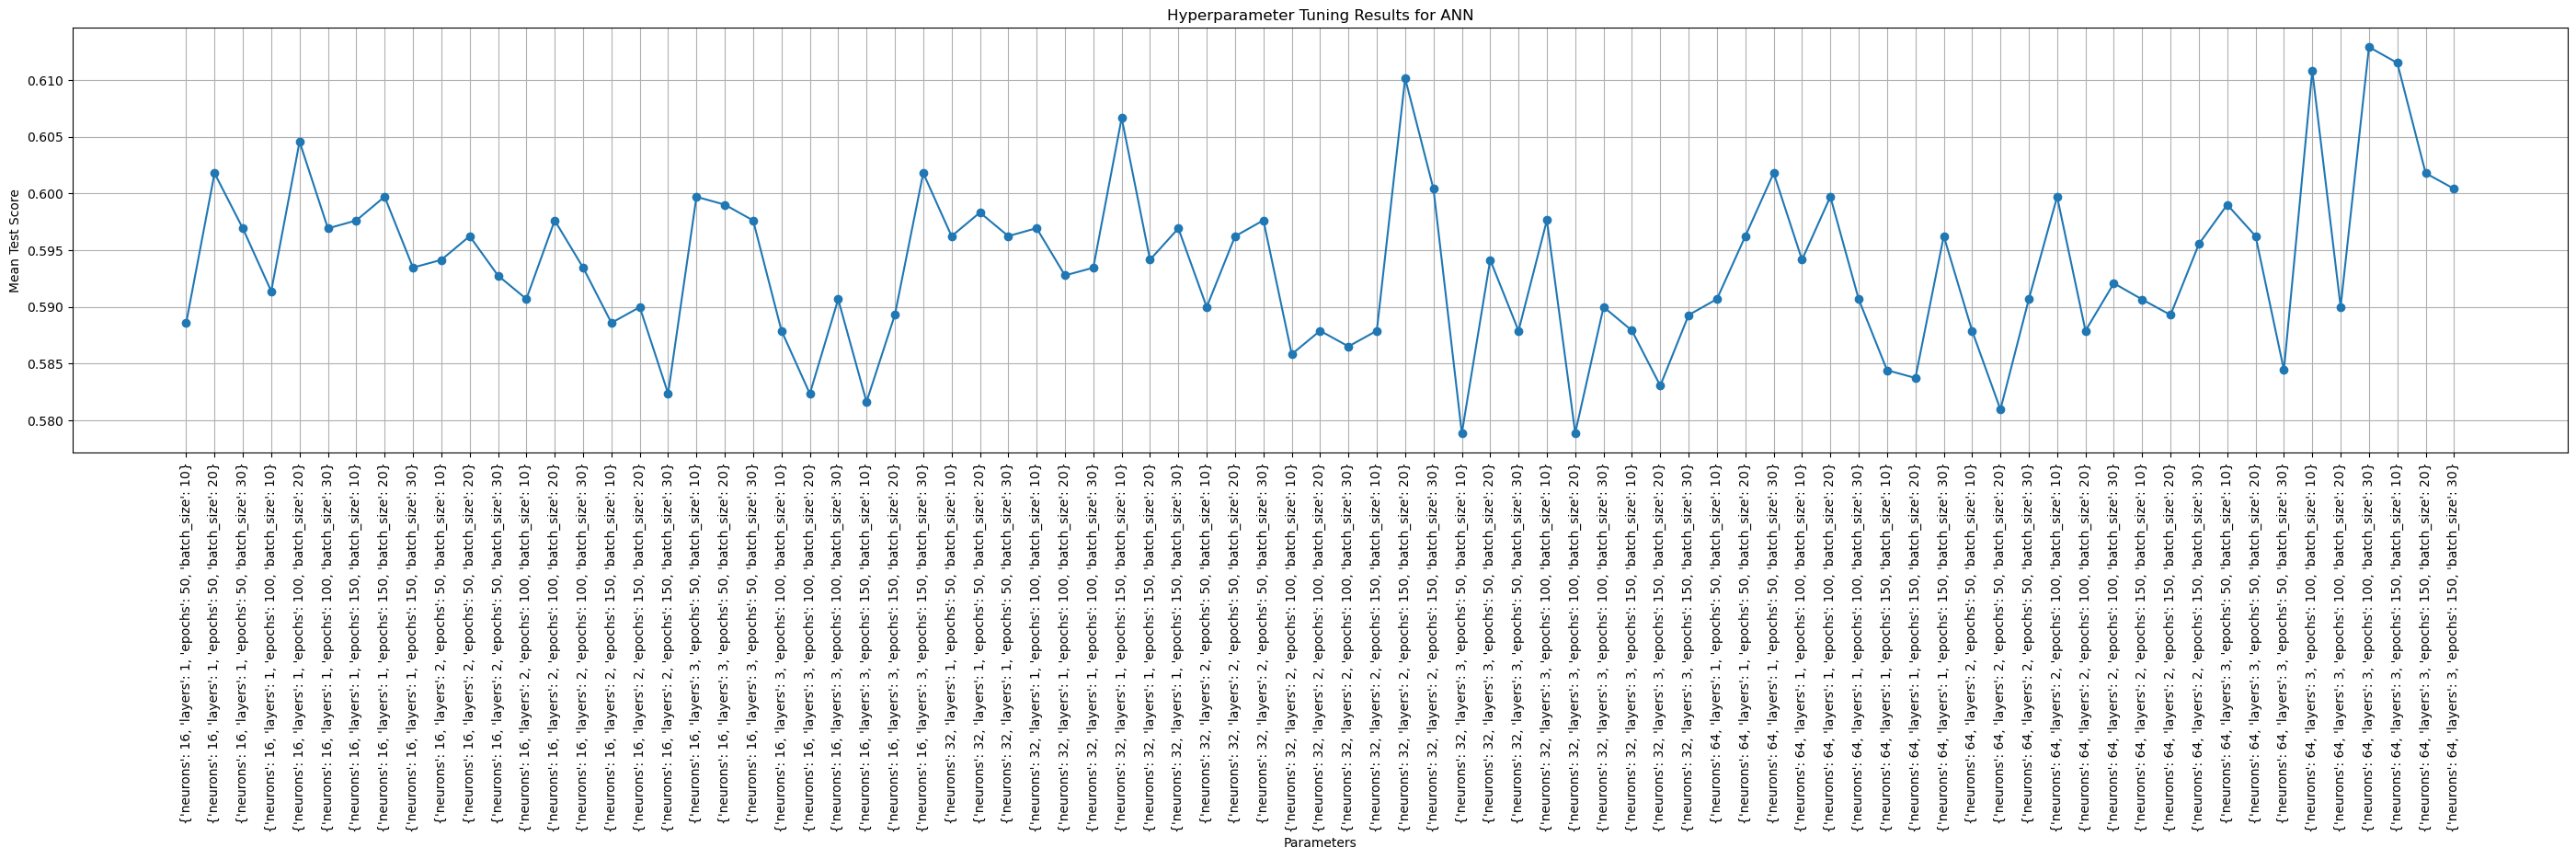

45/45 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.8151
Training completed in 0.2289 seconds.
Training Accuracy: 0.8471
Test Accuracy: 0.6062
Final test accuracy: 0.6062


In [17]:
full_process('processed_wine_quality_pca.csv', 'ANN','pca')

Best parameters found: {'neurons': 16, 'layers': 2, 'epochs': 150, 'batch_size': 10}


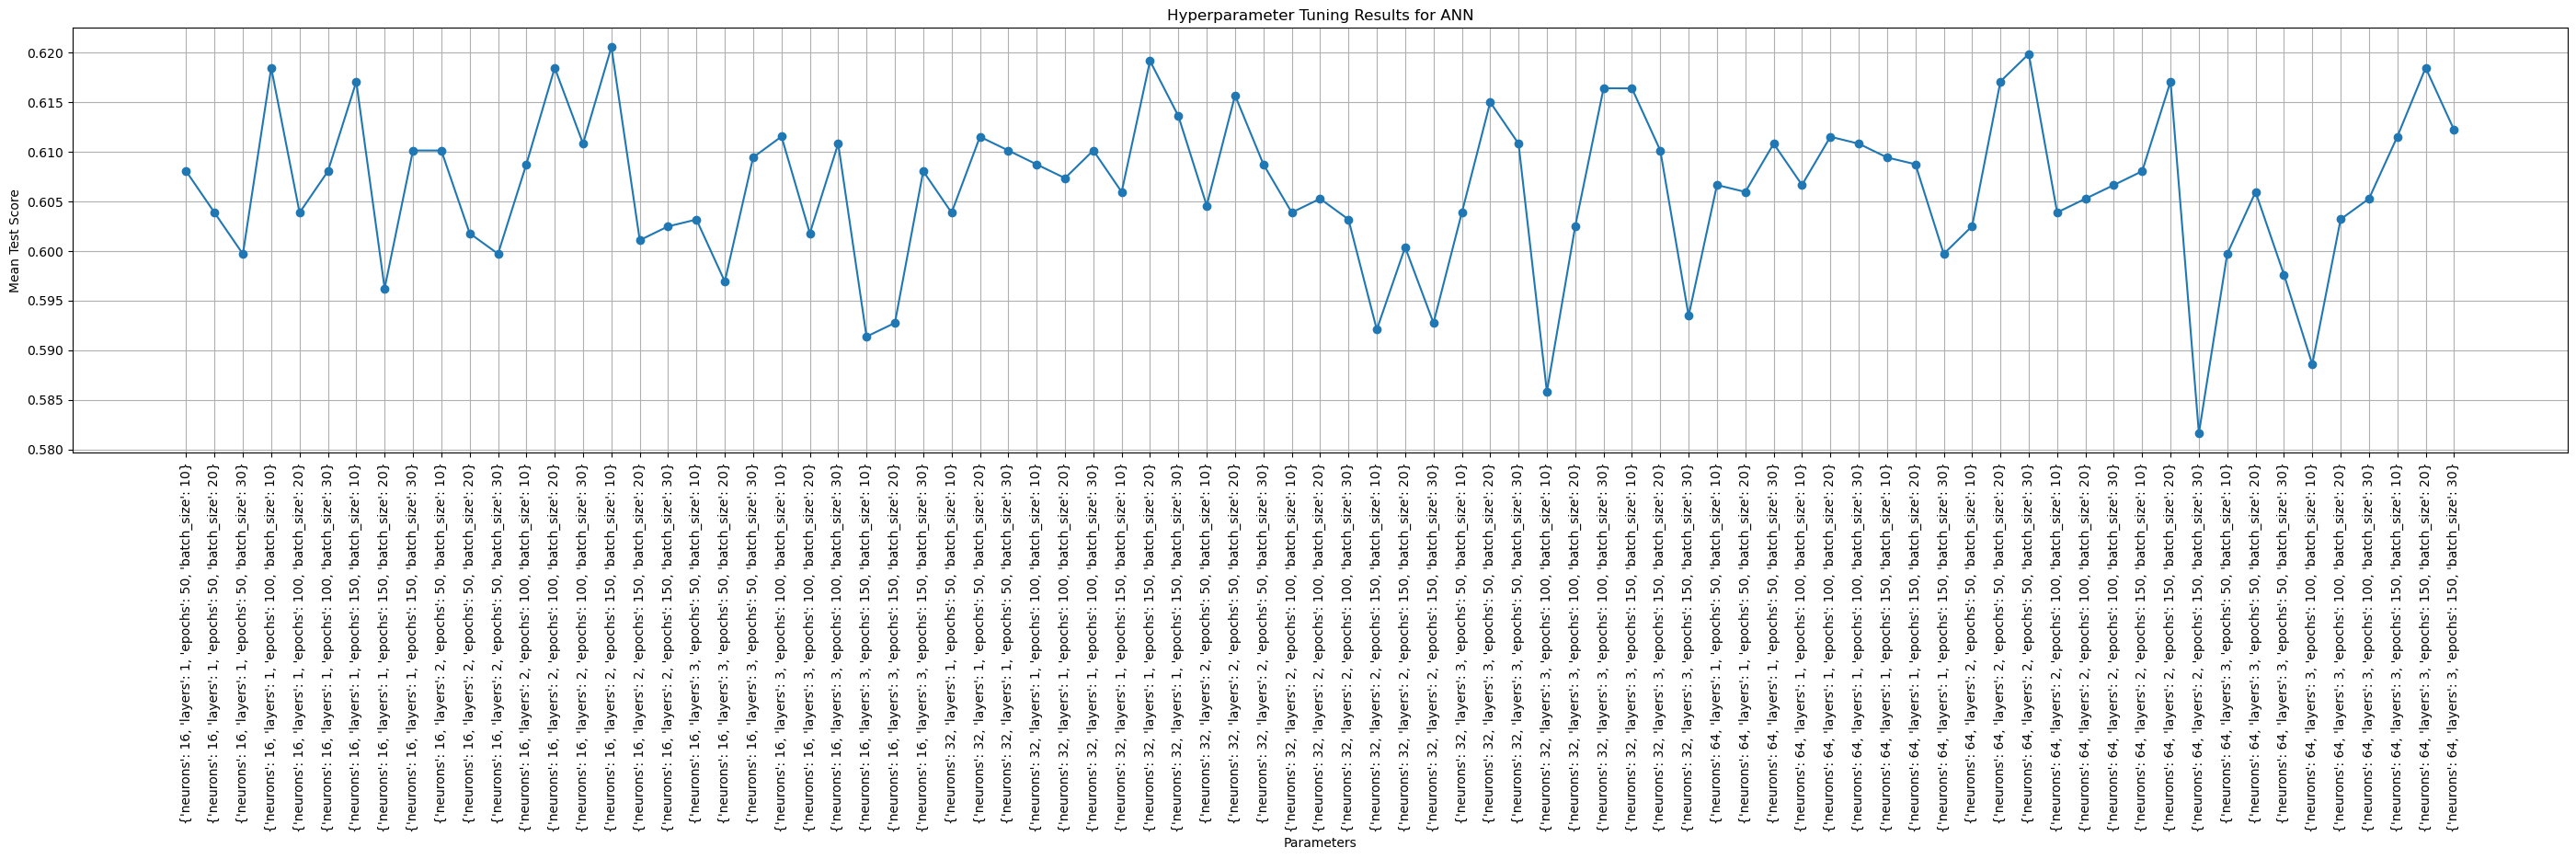

45/45 [==============================] - 0s 2ms/step - loss: 0.7997 - accuracy: 0.6623
Training completed in 0.2022 seconds.
Training Accuracy: 0.6623
Test Accuracy: 0.5687
Final test accuracy: 0.5687


In [18]:
full_process('processed_wine_quality_feature_selected.csv', 'ANN','feature_selected')